# Exoplanet data

Data source: http://exoplanet.eu/catalog/ 

The data is maintained by the Observatoire de Paris 

7347 planets / 5039 planetary systems / 1021 multiple planet systems

This tutorial is based on the following tutorial: http://exoplanet.eu/API/


In [37]:
import pyvo
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io.votable import parse

In [5]:
# Select the Virtual Observatory service:

service = pyvo.dal.TAPService("http://voparis-tap-planeto.obspm.fr/tap")

In [32]:
# Now you have to query this selected service and select the right exoplanet.eu table, 
# which is exoplanet.epn_core as can be seen here. 
# The language to query is based on SQL and is called ADQL (Astronomical Data Query Language), 
# which is a language to retrieve information from tables stored in a database. 
# let's query all the fields (*) in the main database exoplanet.epn_core 
# for planets that have semi-major axes lower than 1 au:

query = "SELECT * FROM exoplanet.epn_core WHERE mass < 60"

In [33]:
# To get the results of your query in a table called results, you should type in:

results = service.search(query) 

In [34]:
# We can first check the number of rows (i.e. planets) corresponding to our query by typing:

len(results)

4204

In [31]:
#And the number of columns (fields):
    
len(results[0])

136

In [10]:
results

<Table length=4204>
      granule_uid           granule_gid    ...                       external_link                       
                                           ...                                                           
         object                object      ...                           object                          
------------------------ ----------------- ... ----------------------------------------------------------
               109 Psc b exoplanet_catalog ...                  http://exoplanet.eu/catalog/109_psc_b--95
               112 Psc b exoplanet_catalog ...                http://exoplanet.eu/catalog/112_psc_b--9287
               112 Psc c exoplanet_catalog ...                http://exoplanet.eu/catalog/112_psc_c--9288
               11 Com Ab exoplanet_catalog ...                 http://exoplanet.eu/catalog/11_com_ab--882
                11 UMi b exoplanet_catalog ...                  http://exoplanet.eu/catalog/11_umi_b--575
               14 And Ab e

In [11]:
# get a specific value for a given field

results[0].get('target_name') 

'109 Psc b'

In [12]:
# get a specific value for a given field 

results['target_name',0]

'109 Psc b'

In [13]:
# You can now save your data permanently as a votable 

vot=results.votable
vot.to_xml("myresults.xml")


In [14]:
!ls

Exoplanets.ipynb
Exoplanets_HW_test.ipynb
Exoplanets_v2.ipynb
exoplanet.eu_catalog.csv
exoplanet_catalog.vot
exoplanets-identifying-transiting-planet-signals.ipynb
exoplanets-identifying-transiting-planet-signals_HW_test.ipynb
myresults.npy
myresults.xml
test.png


In [15]:
# You can now save your data permanently as a numpy table

np.save('myresults', results.table)

In [16]:
!ls

Exoplanets.ipynb
Exoplanets_HW_test.ipynb
Exoplanets_v2.ipynb
exoplanet.eu_catalog.csv
exoplanet_catalog.vot
exoplanets-identifying-transiting-planet-signals.ipynb
exoplanets-identifying-transiting-planet-signals_HW_test.ipynb
myresults.npy
myresults.xml
test.png


In [27]:
# If you want to access to the stored VO table again later, 
# use parse (first import the right package: from astropy.io.votable import parse)    

#vot = parse("myresults.xml")


In [18]:
# Let's convert the data into a more accessible table format

data = vot.get_first_table().to_table(use_names_over_ids=True)

In [19]:
# Let's check the columns in the data table

data.keys()

['granule_uid',
 'granule_gid',
 'obs_id',
 'dataproduct_type',
 'target_name',
 'target_class',
 'time_min',
 'time_max',
 'time_sampling_step_min',
 'time_sampling_step_max',
 'time_exp_min',
 'time_exp_max',
 'spectral_range_min',
 'spectral_range_max',
 'spectral_sampling_step_min',
 'spectral_sampling_step_max',
 'spectral_resolution_min',
 'spectral_resolution_max',
 'c1min',
 'c1max',
 'c2min',
 'c2max',
 'c3min',
 'c3max',
 's_region',
 'c1_resol_min',
 'c1_resol_max',
 'c2_resol_min',
 'c2_resol_max',
 'c3_resol_min',
 'c3_resol_max',
 'spatial_frame_type',
 'incidence_min',
 'incidence_max',
 'emergence_min',
 'emergence_max',
 'phase_min',
 'phase_max',
 'instrument_host_name',
 'instrument_name',
 'measurement_type',
 'processing_level',
 'creation_date',
 'modification_date',
 'release_date',
 'service_title',
 'time_scale',
 'publisher',
 'bib_reference',
 'target_region',
 'species',
 'detection_type',
 'publication_status',
 'mass',
 'mass_error_min',
 'mass_error_max',

In [20]:
# Let's check some of the data

data['mass']

5.743
0.033
9.866
16.1284
11.0873
4.684
8.5
7.1
1.64
37.8
10.3


## Making plot: Mass vs. radius

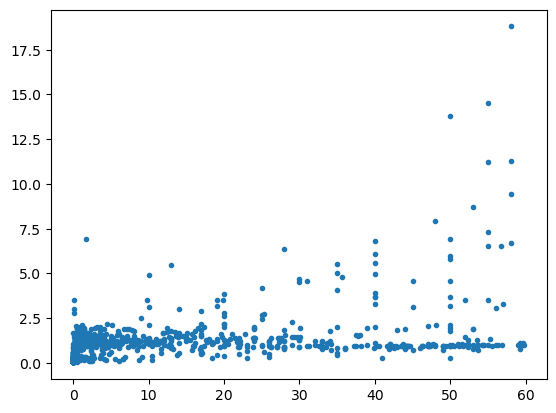

In [21]:
plt.plot(data['mass'], data['radius'], marker = '.', linestyle='')

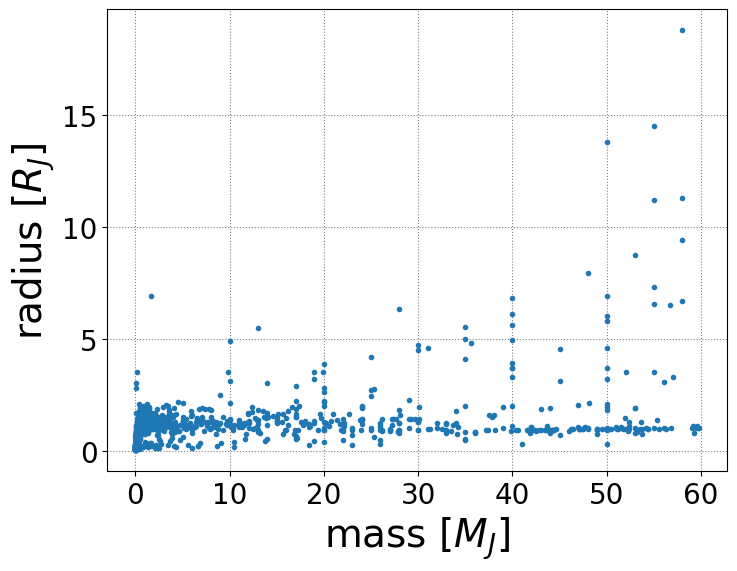

In [22]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(data['mass'], data['radius'], marker = '.', linestyle='')
plt.xlabel("mass [$M_J$]", fontsize=28)
plt.ylabel('radius [$R_J$]', fontsize=28)

#plt.xlim(-300,600)
#plt.ylim(0,1.02)  
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

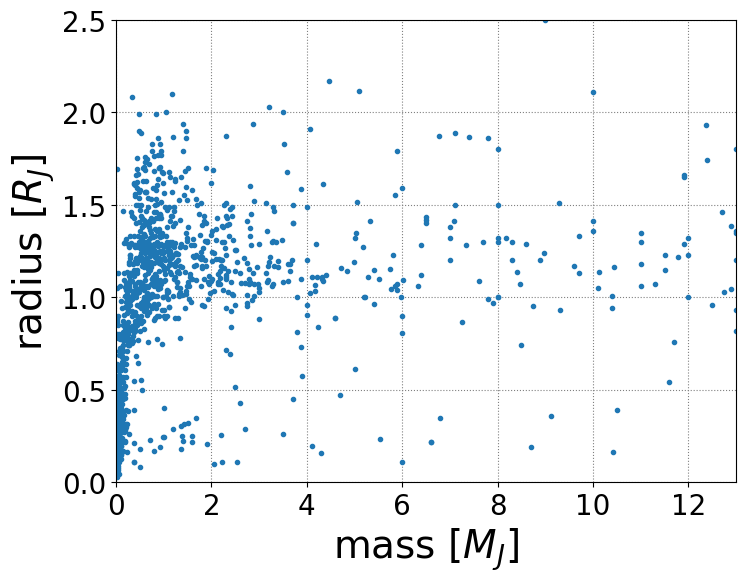

In [23]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(data['mass'], data['radius'], marker = '.', linestyle='')
plt.xlabel("mass [$M_J$]", fontsize=28)
plt.ylabel('radius [$R_J$]', fontsize=28)

plt.xlim(0.00,13)
plt.ylim(0,2.5)  
ax.tick_params(axis='both', which='major', labelsize=20)
fig.savefig('./test.png', dpi=200)

## Histograms

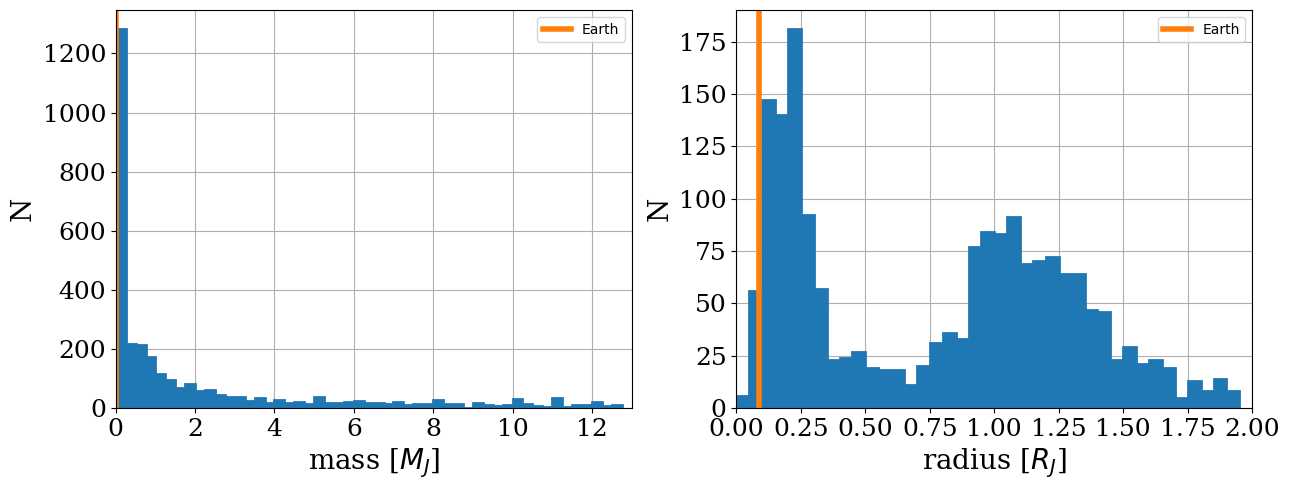

In [24]:
fig = plt.figure(figsize=(13.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(1,2,1)
d = data['mass']
bin_size = np.arange(0,13,0.25) 
plt.hist(d, bins=bin_size, histtype='step', color='C0', fill=True, linewidth=2)
plt.axvline(1/317.83, color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax1.set_xlabel('mass [$M_J$]', size=20,family='serif')
ax1.set_ylabel('N', size=20,family='serif')
plt.grid(True)
plt.legend()
plt.xlim(0.00,13)
plt.tight_layout()

ax2 = fig.add_subplot(1,2,2)
d = data['radius']
bin_size = np.arange(0,2, 0.05) 
plt.hist(d, bins=bin_size, histtype='step', color='C0', fill=True, linewidth=2)
plt.axvline(0.0892147, color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax2.set_xlabel('radius [$R_J$]', size=20,family='serif')
ax2.set_ylabel('N', size=20,family='serif')
plt.legend()
plt.grid(True)
plt.xlim(0.00,2)
plt.tight_layout()

plt.show()

## Orbital period vs mass


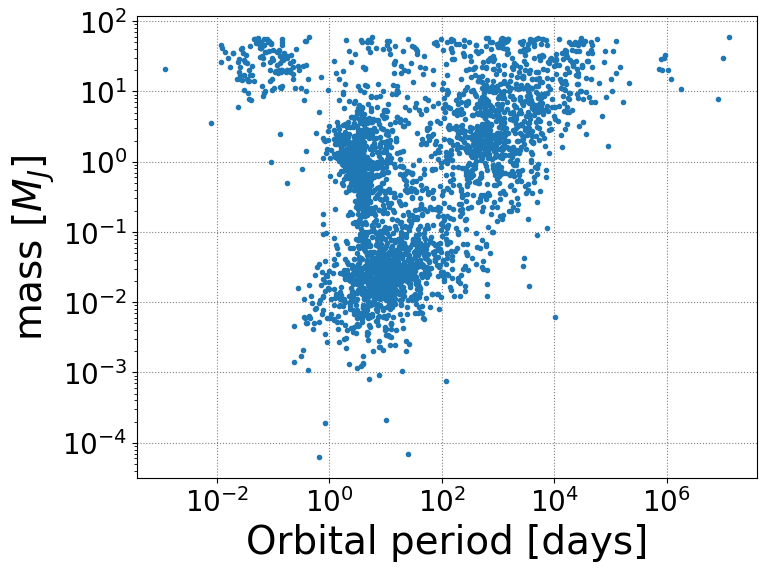

In [25]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(data['period'], data['mass'], marker = '.', linestyle='')
plt.xlabel("Orbital period [days]", fontsize=28)
plt.ylabel('mass [$M_J$]', fontsize=28)
ax.set_xscale('log')
ax.set_yscale('log')
#plt.xlim(-300,600)
#plt.ylim(0,13)  
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

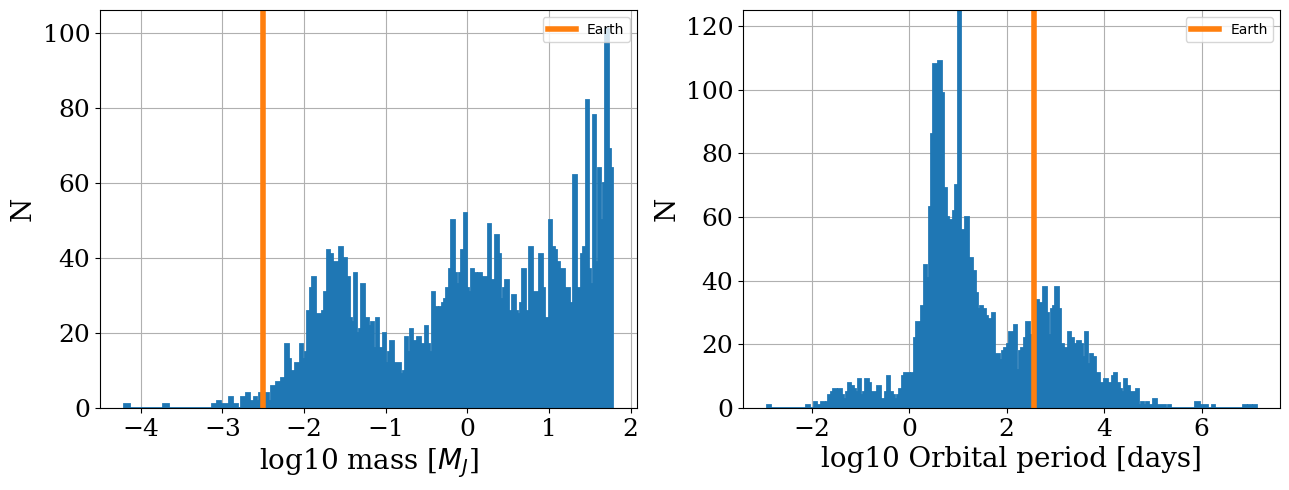

In [36]:
fig = plt.figure(figsize=(13.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(1,2,1)
d = np.log10(data['mass'])
plt.hist(d, bins=200, histtype='step', color='C0', fill=True, linewidth=2)
plt.axvline(np.log10(1/317.83), color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax1.set_xlabel('log10 mass [$M_J$]', size=20,family='serif')
ax1.set_ylabel('N', size=20,family='serif')
plt.grid(True)
plt.legend()
#plt.xlim(0.00,13)
plt.tight_layout()

ax2 = fig.add_subplot(1,2,2)
d = np.log10(data['period'])
plt.hist(d, bins=200, histtype='step', color='C0', fill=True, linewidth=2)
plt.axvline(np.log10(365), color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax2.set_xlabel('log10 Orbital period [days]', size=20,family='serif')
ax2.set_ylabel('N', size=20,family='serif')
plt.legend()
plt.grid(True)
plt.ylim(0.00,125)
plt.tight_layout()

plt.show()